# EDA 

## EDA ?

데이터를 분석하는 방법론은 매우 많습니다. EDA는 **데이터 그 자체** 만으로부터 인사이트를 얻어내는 접근법을 말합니다. 시각화, 통계적 접근법 등이 다양하게 사용됩니다.

### EDA의 프로세스

1. 분석의 목적과 변수(column or attribute) 확인
2. 데이터 전체적으로 살펴보기
    ex) 상관관계, N/A? 등을 파악
3. 데이터의 개별 속성 파악 하기

## Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [1]:
!kaggle competitions download -c titanic

403 - Forbidden


In [2]:
# 라이브러리 불러오기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 데이터 불러오기

titanic_df = pd.read_csv('./train.csv')

## 1. 분석의 목적과 변수 확인

### 분석 목적

살아 남은 사람들은 어떤 특징을 가지고 있을까?


### 변수 확인

| **Variable** | **Definition**                             | **Key**                                        |
| :----------- | :----------------------------------------- | :--------------------------------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### 살아 남은 사람들은 어떤 특징을 가지고 있을까?


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 각 column의 데이터 타입 확인하기


In [6]:

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

### 데이터 전체 정보를 얻는 함수: .describe()


In [9]:

titanic_df.describe().T # 수치형 테이터에 대한 요약만을 제공

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 상관계수 확인!

> Correlation is NOT Causation

상관성과 인과성을 구분하여 관찰 할 필요가 있다.

- 상관성: A up, B up
- 인과성: A -> B

In [14]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


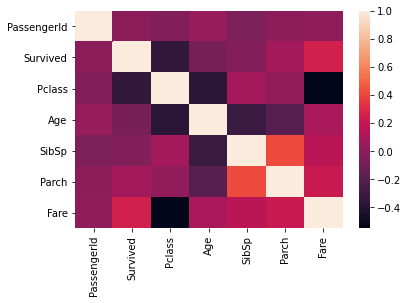

In [13]:
sns.heatmap(titanic_df.corr());

### 결측치 확인

Age, Cabin, Embarked에서 결측치를 발견 할 수 있다.

In [15]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Survived Column

In [19]:
# 생존자, 사명사 명수는?

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### 생존자와 사망자수를 Barplot으로 그려보기

- `sns.countplot()`

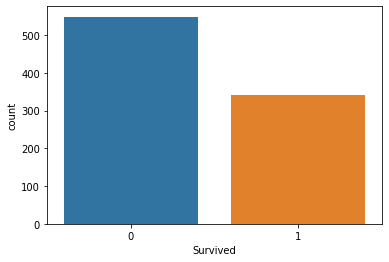

In [20]:
sns.countplot(x = 'Survived', data=titanic_df);

### PClass

In [24]:
# PClass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [25]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby('Pclass').sum() # 1: 생존

,Survived
Pclass,
1,136
2,87
3,119


In [27]:
# 각 클래스 당 생존 비율
titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean() # mean의 의미는 sum()을 count()로 나눈 의미

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


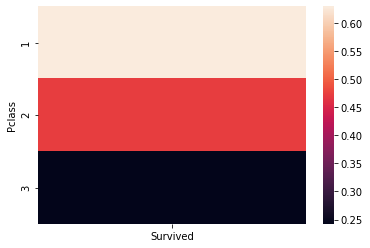

In [28]:
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean());

### III. SEX

In [29]:
titanic_df[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [32]:
titanic_df.groupby(['Survived', 'Sex'])[['Survived']].count()

Survived
Survived Sex             
0        female        81
         male         468
1        female       233
         male         109

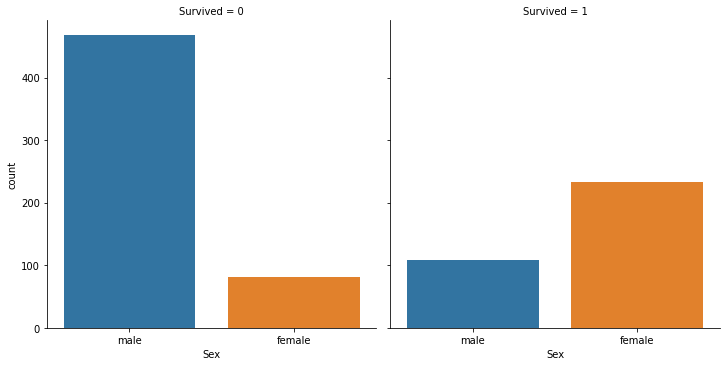

In [35]:
# sns.catplot

sns.catplot(x = 'Sex', col='Survived', kind = 'count', data=titanic_df);

### IV. Age

#### Remind

- 결측지 존재!

In [37]:
titanic_df.describe()[['Age']]

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


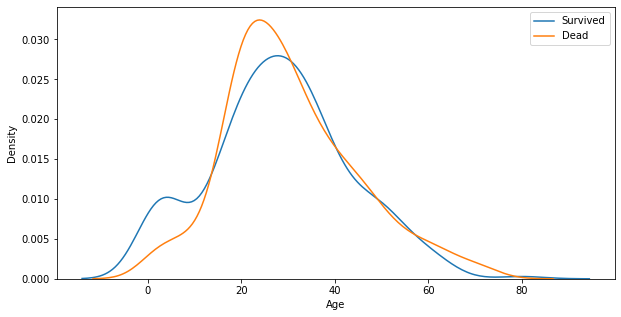

In [45]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=titanic_df[titanic_df.Survived==1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived==0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])
plt.show()


In [46]:
titanic_df[titanic_df.Survived==1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

## Appendix

### Sex + Pclass vs. Survived

복합적인 요소들을 그래프로 그릴 때는 `sns.catplot`을 많이 사용한다.

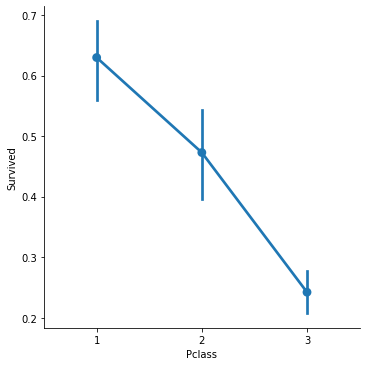

In [47]:
sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df);

이 그래프는 `Survived`에 대한 `Pclass`의 점추정치와 신뢰구간을 나타낸다

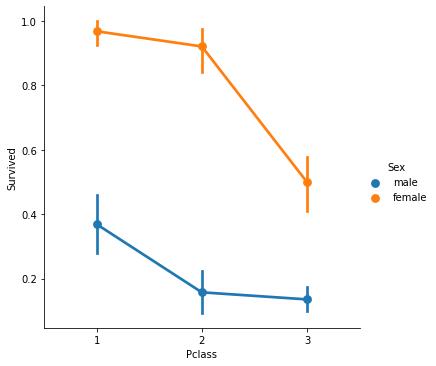

In [48]:
sns.catplot(x='Pclass', y='Survived', kind='point',hue='Sex', data=titanic_df);

### Age + Pclass



In [49]:
# Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass==1]

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

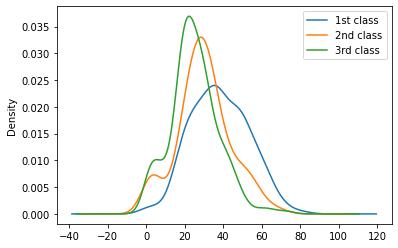

In [53]:
titanic_df['Age'][titanic_df.Pclass==1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass==3].plot(kind='kde')
plt.legend(['1st class', '2nd class', '3rd class']);

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()